# Import important libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# read the csv file 
salary_df = pd.read_csv('salary.csv')
salary_df.head(7)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150


In [6]:
salary_df.tail(2)

,YearsExperience,Salary
33,12.9,135675
34,13.5,139465


In [7]:
print(salary_df['Salary'].max() , salary_df['Salary'].min() )

139465 37731


In [8]:
#What are the number of years of experience corresponding to employees with minimum and maximim salaries?
ye=salary_df[salary_df['Salary'] ==salary_df['Salary'].max()]
ye['YearsExperience']

34    13.5
Name: YearsExperience, dtype: float64

In [9]:
x=salary_df.loc[salary_df['Salary'] == salary_df['Salary'].min() ] ['YearsExperience']
print(x)

2    1.5
Name: YearsExperience, dtype: float64


# EDA and Visualization

In [10]:
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

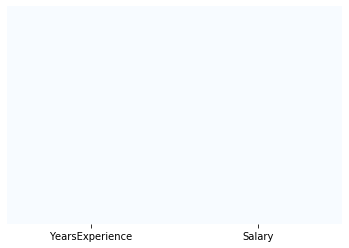

In [11]:
#check for any nulls
sns.heatmap(salary_df.isnull(),yticklabels = False, cbar = False, cmap="Blues")


In [12]:
#salary_df.info(verbose=True)

In [13]:
#conda update pandas==1.0.5

In [14]:
salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f607df12ad0>,
      dtype=object)

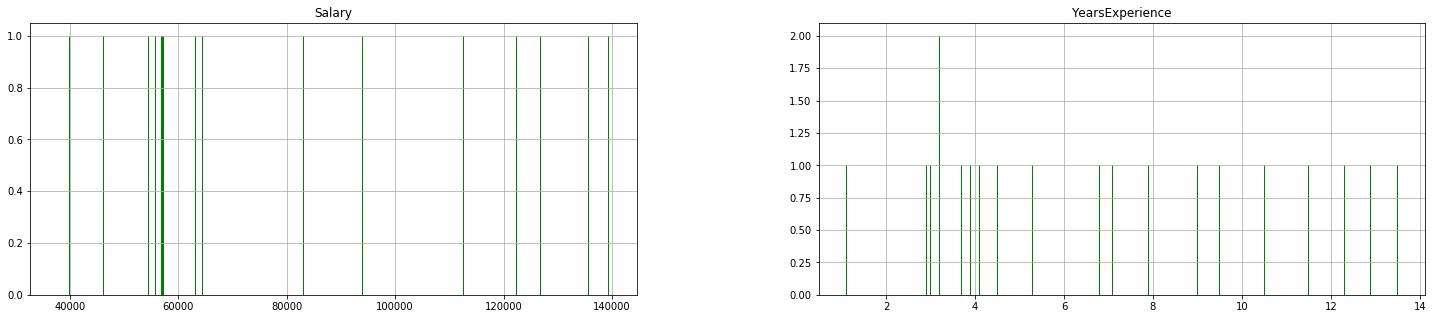

In [15]:
salary_df.hist(bins = 1000, figsize = (25,5), color = 'g')

In [16]:
# plot pairplot
#sns.pairplot(salary_df)

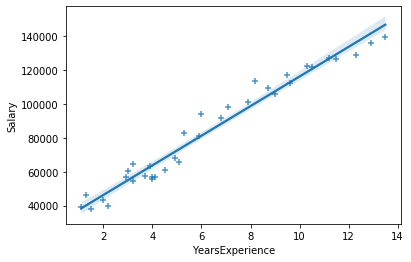

In [17]:
ax = sns.regplot(x=salary_df['YearsExperience'], y=salary_df['Salary'], marker="+")

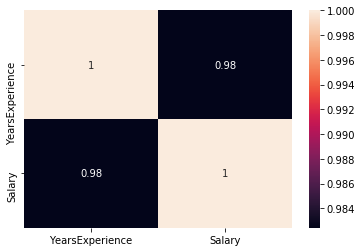

In [18]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Spliting data to train and test set

In [19]:
X=np.array(salary_df[['YearsExperience']]).astype('float32')
y=np.array(salary_df[['Salary']]).astype('float32')
            

In [20]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26, 1) (9, 1) (26, 1) (9, 1)


# Linear Regression Model

In [22]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

#Intercept (B can be 1..2...3.) when fit_intercept = True else b=0 when fit_intercept = false regresssion_model_sklearn.intercept_ = 0
regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9665278711302134

In [24]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[9033.015]]
Linear Model Coefficient (b):  [27408.797]


# Model Prediction Plot


Text(0.5, 1.0, 'Salary vs. Years of Experience')

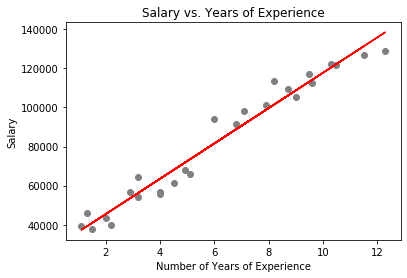

In [26]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

# Predict Using Linear Regression Model


In [39]:
exp= [[5]]
sal=regresssion_model_sklearn.predict(exp)
sal

array([[72573.87011719]])

# Train Model Using SageMaker

In [52]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
#bucket = Session().default_bucket()
bucket = 'sagemaker.s3.bucket'
# Let's define the S3 bucket and prefix that we want to use in this session
# bucket = 'sagemaker-practica' # bucket named 'sagemaker-practical' was created beforehand
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::805403146857:role/service-role/AmazonSageMaker-ExecutionRole-20210707T114302


In [53]:
X_train.shape
y_train = y_train[:,0]
y_train

array([ 54445.,  56642., 112635.,  55794.,  39343.,  91738., 128765.,
       121872., 101302.,  46205.,  43525., 113812.,  39891.,  37731.,
        67938., 122391., 126756., 116969.,  66029.,  61111., 105582.,
        98273.,  56957.,  64445., 109431.,  93940.], dtype=float32)

In [54]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [55]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker.s3.bucket/linear_learner/train/linear-train-data


In [56]:
# Make sure that the target label is a vector
y_test = y_test[:,0]


In [57]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [58]:
# Key refers to the name of the file    
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://sagemaker.s3.bucket/linear_learner/test/linear-test-data


In [ ]:
print(X_test)

In [59]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker.s3.bucket/linear_learner/output
